# Using StatsModels to perform Time Series Analysis

Python module to run different statistical models.

Will also work with the various tests that are associtated with Time Series Models.

## Introduction to StatsModels:

we will learn how to do a function test but it also has lots of useful tests

### Properties of Time series data:

    - Trends
        - This is where the data moves upward, stationary and Downward Trend
    - Seasonality
        - This is repeating trend over certain periods.
    - Cyclical
        - Trends with no set repetition
        - Can't distinctly say when the trend will take place again

### Hodrick-Prescott Filter:

Seperates the data into the trend and cyclical component done by minimizing the loss function.

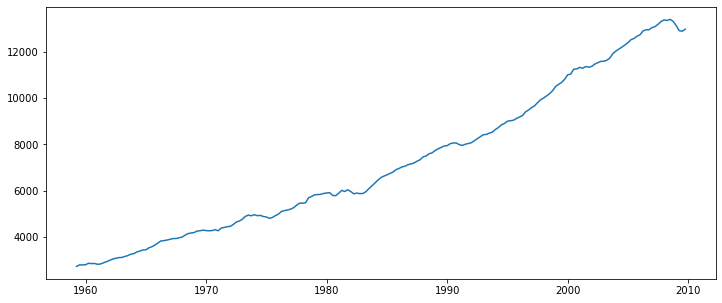

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data\macrodata.csv',index_col=0,parse_dates=True)

plt.figure(figsize=(12,5))
plt.plot(df.index,df['realgdp'])
plt.show()

We can now use the statmodels to work with the data:

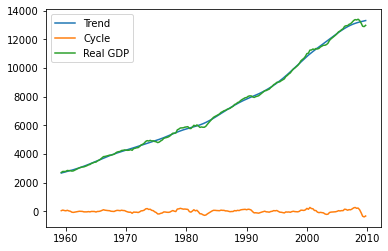

In [2]:
from statsmodels.tsa.filters.hp_filter import hpfilter

gdp_cycle,gdp_trend = hpfilter(df['realgdp'],lamb=1600)

plt.plot(df.index,gdp_trend,label='Trend')
plt.plot(df.index,gdp_cycle,label='Cycle')
plt.plot(df.index,df['realgdp'],label='Real GDP')
plt.legend()
plt.show()

### ETS Decomposition

Error - Trend - Seasonality models

this includes

    - Exponential Smoothing
    - Trend Method Models
    - ETS Decomposition

ETS Decomposition is a specific use for this model:

ETS will take all of the terms for smoothing and can create a generalized model based on the components.

It is advised to build charts based on the various components:

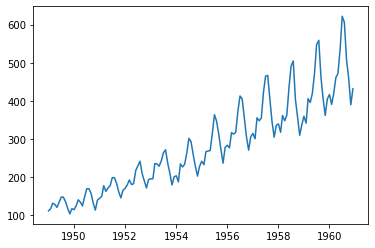

In [3]:
df = pd.read_csv('data\Time Series\\airline_passengers.csv',index_col='Month',parse_dates=True)

df.dropna(inplace=True)

plt.plot(df.index,df['Thousands of Passengers'])
plt.show()

There is an additive model and a multiplicative model based on if the data looks like it has a linear or non linear rate.

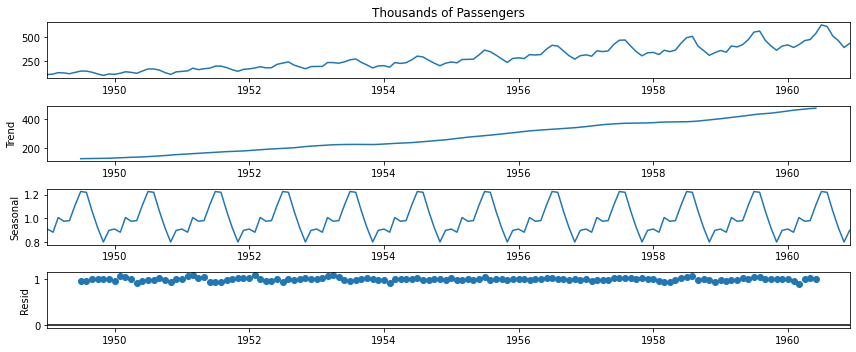

In [4]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize']=12,5
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Thousands of Passengers'],model='multiplicative')

result.plot();

### EWMA Models

Exponentially Weighted Moving Average Models.

we could theoretically use Moving averages in order to create a generalised model to explain the things happening with a time series. this model looks at the past data and has the more recent data counting for more when we decide on the future values and the later data count less.

We can now use Stats Tools to apply the model:

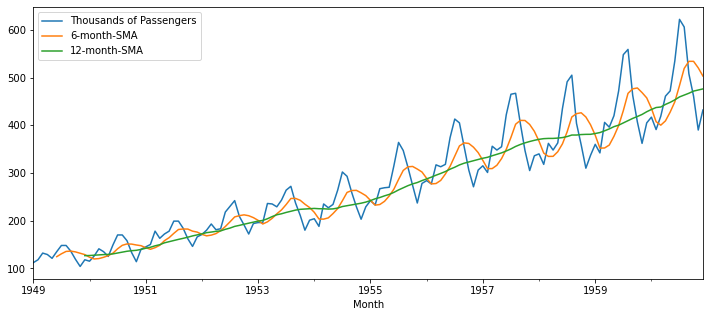

In [5]:
df['6-month-SMA']=df['Thousands of Passengers'].rolling(6).mean()
df['12-month-SMA']=df['Thousands of Passengers'].rolling(12).mean()

df.plot()

Now let's do the Exponential moving average:

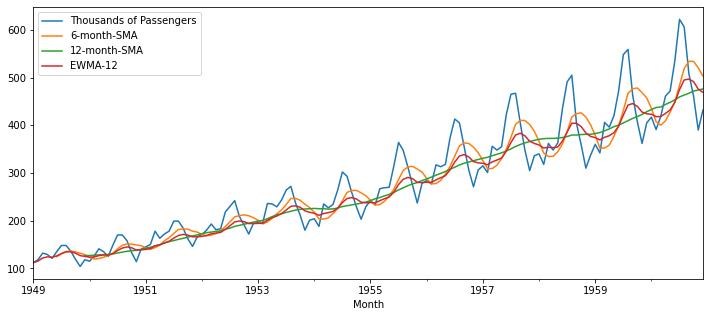

In [6]:
df['EWMA-12']=df['Thousands of Passengers'].ewm(span=12).mean()
df.plot()

span - length of data that is used to calculate the values (This is the easiest on to understand)
Centre of mass - it is the central point to the span
Half life - Time for the weight to reduce to one half

### Holt-Winters Method:

The EWMA does not account for other areas that need to be taken into account, this includes Trend and Seasonality where Holt-Winters will assist with these area's.

This method can be used for forecasting as well as fitting models.

this included one forecast equations and three aditional smoothing equations (l_t, b_t and s_t)

There are two variations to this method that differ to the seasonal component.

Holt's method included a beta smoothing factor to the original EWMA (Also know as double Exponential Smoothing).

Triple exponential smoothing included the seasonality smoothing - this is the Holt-Winters Method.

Let's now implement the model with statsmodels:

In [7]:
df = pd.read_csv('data\Time Series\\airline_passengers.csv',index_col='Month',parse_dates=True)

df.dropna(inplace=True)

df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

We need to tell Stats models that there is a frequency as Pandas has set it as none.

In [8]:
df.index.freq='MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

we have set the data to have a month start frequency:

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

model = SimpleExpSmoothing(df['Thousands of Passengers'])

fitted_model = model.fit(smoothing_level=alpha,optimized=False)

df['SES12']=fitted_model.fittedvalues.shift(-1)

c:\users\poisson\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


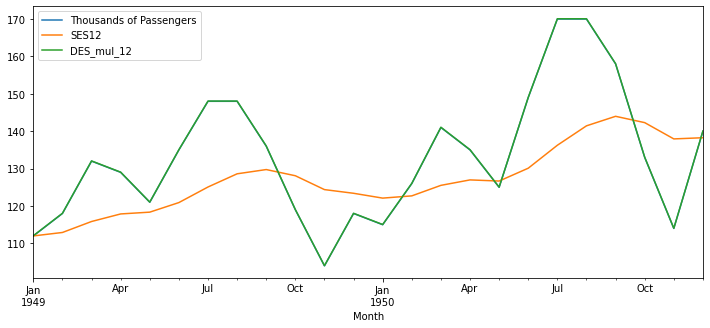

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


df['DES_mul_12']= ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',).fit().fittedvalues.shift(-1)
df.iloc[:24].plot(figsize=(12,5))

We can see the double exponetial smoothing that takes into account the trend is very close to the actual results but it is not exactly on top of the original data.

let's see what Holt Winters method can do:

c:\users\poisson\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\poisson\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


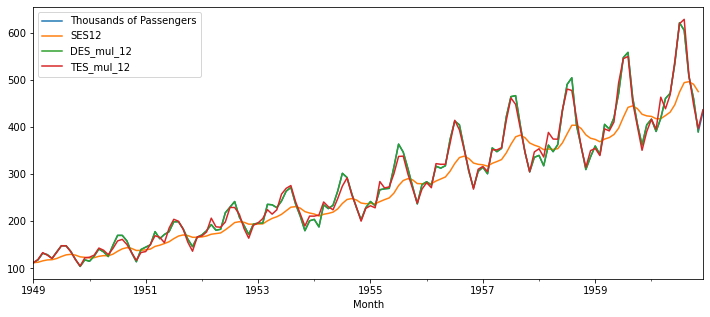

In [11]:
model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
fitted_model = model.fit()
df['TES_mul_12']= fitted_model.fittedvalues

df.plot()

## General Forecasting Models:

We are going to explore different model types to forecast future periods based on the data. The first thing we need to do is test the data and decide on which model to use.

we will look at ACF and PACF plots to assist with model selection.

### Introduction ot Forecasting

We have seen how Holt-winters is used to model existing series but we have not seen this used for forecasting.

We will also look at how we can evaluate the model based on the collected data.

In [12]:
df = pd.read_csv('data\\Time Series\\airline_passengers.csv',index_col='Month',parse_dates=True)

df.index.freq='MS'

df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


test train sets work similar to normal modelling except we split the data based on the data we have on the time series. So the most recent data will be used for test data.

We will use an 80:20 split but in most cases the test size should be at least the same size as the forecast period we are looking at.

In [13]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

c:\users\poisson\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\poisson\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


We now have a fitted model, let's now run some predictions:

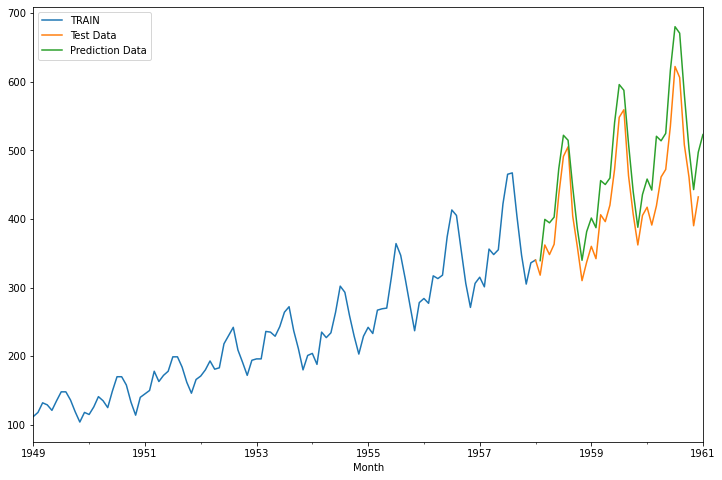

In [14]:
test_predictions = fitted_model.forecast(36)

train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='Test Data')
test_predictions.plot(legend=True,label='Prediction Data')

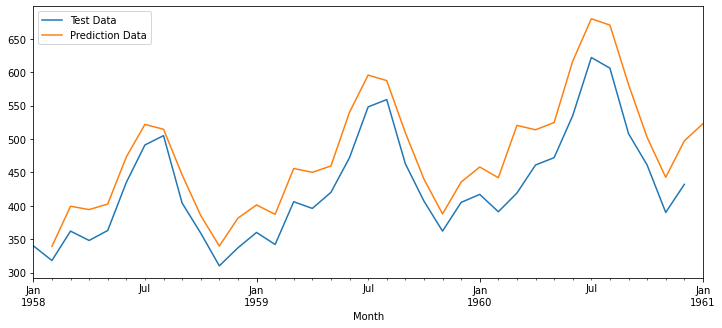

In [15]:
test_data['Thousands of Passengers'].plot(legend=True,label='Test Data')
test_predictions.plot(legend=True,label='Prediction Data')

### Evaluating Forecast Predictions:

It is not great to always look at the numerical values to predict the data so we should rather come up with a numerical value.

There are Time Series Metrics for this:

- MAE - Mean Absolute Error
- MSE - Mean Square Error
- RMSE - Root Mean Square Error

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test_data,test_predictions)

63.02897225012722

In [17]:
mean_squared_error(test_data,test_predictions)

5614.058555260945

In [18]:
from math import sqrt

sqrt(mean_squared_error(test_data,test_predictions))

74.92702152935846

c:\users\poisson\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\poisson\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


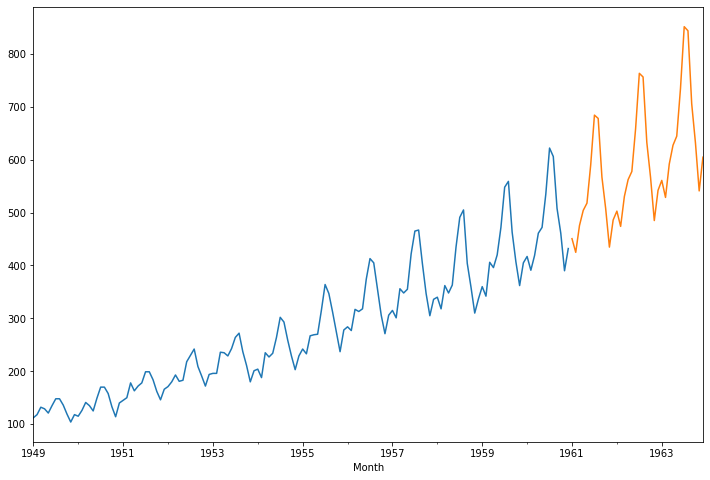

In [19]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

forecast_predictions = final_model.forecast(36)

df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

### Stationarity

If it does not ehibit trends or seasonality:

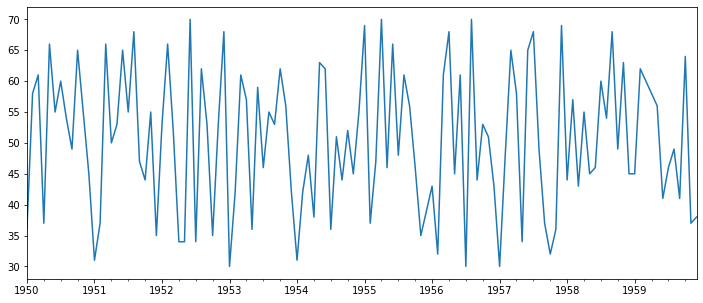

In [20]:
df2 = pd.read_csv('data\\Time Series\\samples.csv',index_col=0,parse_dates=True)

df2['a'].plot()

The above data is stationary but the data below is non-stationary.

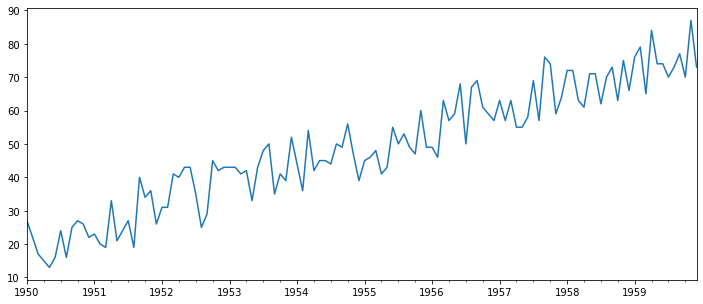

In [21]:
df2['b'].plot()

Non-Stationary can be made into a stationary data set by using differencing which can be done with Statsmodels:

In [22]:
from statsmodels.tsa.statespace.tools import diff

diff(df2['b'],k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

Now if we plot this we will see that after taking the first order away we now have stationary data:

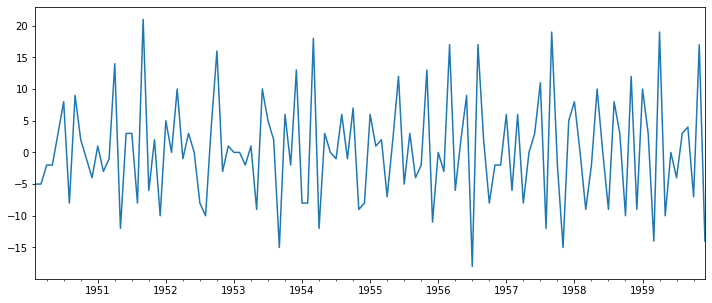

In [23]:
diff(df2['b'],k_diff=1).plot()